Zafrin Dhali <br>
A12122669  <br>
Cogs 118 <br>


**** margin = 2/sqrt(w*w)

Q1. 

1. Which of the following statements is false regarding structural risk minimization? <br>
(A) It is a method to perform model selection, i.e., choosing an optimal classifier
to reduce the test errors. <br>
(B) The goal is to balance fitting the training data against the model complexity. <br>
(C) Different algorithms often have different model complexities. <br>
<b>(D) We always need to compute the testing error for each model to perform
structural risk minimization. <b/> <br>


2. Which of the following statements is false regarding cross validation? <br>
(A) It is a method to perform model selection, i.e., choosing the optimal parameters for a classifier. <br>
(B) It works for both regression and classification models. <br>
(C) Cross validation can be used to perform structural risk minimization. <br>
<b> (D) To perform k-fold cross validation, the greater the k is, the more opitmal the result will be. <b/> <br>


e=(1/k) SUM (e(f(i)) --> as k increases, e decreases <br>
For statistically significant results, e and var are supposed to be small<br>
As k increases, e decreases but the increasing k groups also create overfitting so as k increases, e gets better, till the model becomes overfit. 

## Q2 LDA

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [6]:
def print_latex(mat):
    s = r'\begin{bmatrix}' + '\n'
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            if j != mat.shape[1] - 1:
                s += '{: .4f} & '.format(mat[i,j])
            else:
                s += '{: .4f} \\\\\n'.format(mat[i,j])
    s += r'\end{bmatrix}'
    print(s)

(2, 100) (2, 100)


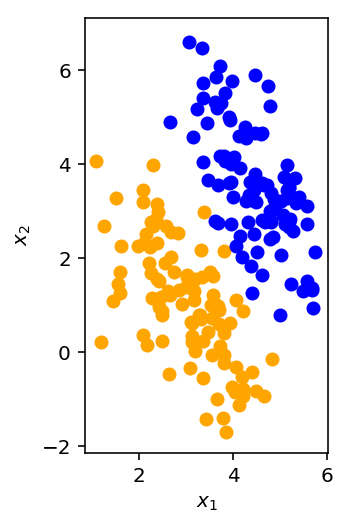

In [7]:
# Load the data and visualize.
Xs = np.load('lda.npy')

X_0 = np.matrix(Xs[:, 0:2]).T  # Shape: (2, 100).  CLASS 0
X_1 = np.matrix(Xs[:, 2:4]).T  # Shape: (2, 100).  CLASS 1

print(X_0.shape, X_1.shape)
plt.scatter(X_0[0].tolist(), X_0[1].tolist(), color='orange')
plt.scatter(X_1[0].tolist(), X_1[1].tolist(), color='blue')
plt.axis('scaled')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [8]:
# (a) Compute mean of each class.
mu_0=X_0.mean(1)
mu_1=(X_1.mean(1))
print(mu_0.shape, mu_1.shape)
print('mu_0=\n{},\nmu_1=\n{}'.format(mu_0, mu_1))

(2, 1) (2, 1)
mu_0=
[[2.98351552]
 [1.06453902]],
mu_1=
[[4.46952033]
 [3.52885988]]


In [9]:
# (b) Compute the covariance matrix for each class, Sigma_0 and Sigma_1.
Sigma_0=np.cov(X_0)
Sigma_1=np.cov(X_1)

print_latex(Sigma_0)
print_latex(Sigma_1)

\begin{bmatrix}
 0.7063 & -0.6905 \\
-0.6905 &  1.6147 \\
\end{bmatrix}
\begin{bmatrix}
 0.4898 & -0.5748 \\
-0.5748 &  1.6767 \\
\end{bmatrix}


In [10]:
# (c) Find the optimal w_star and w_tilde_star with unit length.
#w* = (x0+ x1)^-1 (u0-u1)
print (X_0.shape)
w_star=np.dot((Sigma_0+Sigma_1).T, mu_0-mu_1)
if X_0.shape== w_star.shape:
    print ("X match w" )
norm=np.dot(w_star.T,w_star)
w_tilde_star = np.dot((np.linalg.pinv(norm)), w_star.T)
print (w_star.shape, w_tilde_star.shape)
print ('w_star=\n{},\nw_tilde_star=\n{}'.format(w_star, w_tilde_star))

(2, 100)
(2, 1) (1, 2)
w_star=
[[ 1.34067196]
 [-6.23084369]],
w_tilde_star=
[[ 0.03300456 -0.15339042]]


(2, 1) (1, 2) (2, 100) (2, 100)
100 100


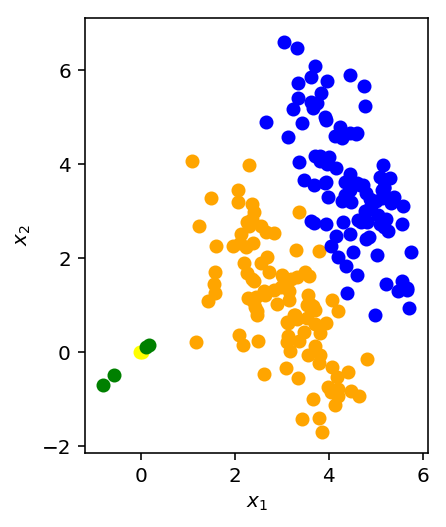

In [11]:
# (d) Compute the projection and plot the figure.
print (w_star.shape, w_tilde_star.shape, X_0.shape, X_1.shape)
Xproj_0=[]
for a in X_0.T:
    aa=np.dot(w_tilde_star, a.T)
    Xproj_0.append(np.dot(aa.T,w_tilde_star))
Xproj_1=[]
for b in X_1.T:
    bb=np.dot(w_tilde_star, b.T)
    Xproj_1.append(np.dot(b.T,w_tilde_star))

print (len(Xproj_0), len(Xproj_1))
plt.scatter(X_0[0].tolist(), X_0[1].tolist(), color='orange')
plt.scatter(X_1[0].tolist(), X_1[1].tolist(), color='blue')
plt.scatter(Xproj_0[0].tolist(), Xproj_0[1].tolist(), color='yellow')
plt.scatter(Xproj_1[0].tolist(), Xproj_1[1].tolist(), color='green')
plt.axis('scaled')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [13]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'
from sklearn.metrics import classification_report


## Q5 Linear SVM

In [14]:
# 1) Load data.

X_and_Y =np.load('arrhythmia.npy')    # Load data from file.
np.random.shuffle(X_and_Y)
# Shuffle the data.
print(X_and_Y.shape) # Check the shapes.
X = X_and_Y[:,:]    # First column to second last column: Features (numerical values) 
Y = X_and_Y[:,-1]   # Last column: Labels (0 or 1)
print(X.shape, Y.shape) # Check the shapes.

(452, 280)
(452, 280) (452,)


In [15]:
# 2) Split the dataset into 2 parts: 
#    (a) Training set + Validation set  (80% of all data points)
#    (b) Test set                       (20% of all data points)
print ("train count: " , np.floor((len(X)*.8)))
print ("test count: " , int((len(X))-np.floor((len(X)*.8))))
train_ct=int(np.floor((len(X)*.8)))
X_train_val = X[:train_ct, :] # Get features from train + val set.
X_test = X[train_ct: , :] # Get features from test set.     
Y_train_val = Y[:train_ct] # Get labels from train + val set.
Y_test = Y[train_ct:] # Get labels from test set.  
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

train count:  361.0
test count:  91
(361, 280) (91, 280) (361,) (91,)


In [16]:
# 3) Consider linear kernel. Perform grid search for best C 
#    with 3-fold cross-validation. You can use svm.SVC() for SVM
#    classifier and use GridSearchCV() to perform such grid search.
#    For more details, please refer to the sklearn documents:
#         http://scikit-learn.org/stable/modules/svm.html
#         http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

classifier=svm.LinearSVC()
C_list=[10**-5, 10**-4 , 10**-3, 10**-2, 10**-1]
parameters={"C": C_list}# Different C to try.
classifier = GridSearchCV(classifier, param_grid=parameters, return_train_score='True')

classifier.fit(X_train_val, Y_train_val ) 
print ("Best parameter: ", classifier.best_params_)

Best parameter:  {'C': 0.0001}


In [17]:
# 4) Draw heatmaps for result of grid search and find 
#    best C for validation set.

def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    

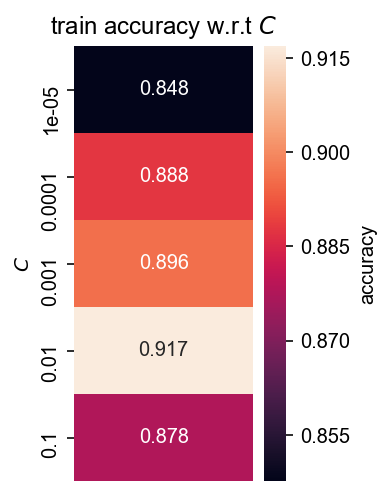

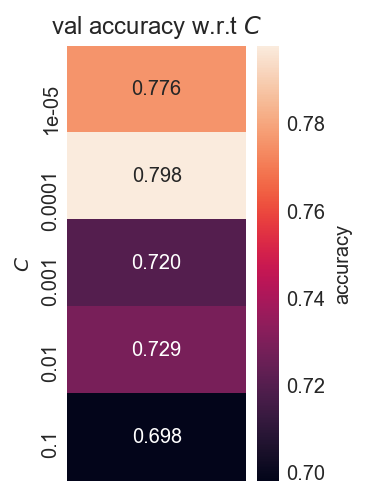

[[0.77562327]
 [0.79778393]
 [0.72022161]
 [0.72853186]
 [0.69806094]]


In [18]:
#
# You can use the draw_heatmap_linear() to draw a heatmap to visualize 
# the accuracy w.r.t. C and gamma. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8],
#                             [0.7]])
# demo_C_list     = [0.1, 1]
# draw_heatmap_linear(demo_acc, 'demo accuracy', demo_C_list)
##
#diff=[1 if classifier.predict(X_train_val)[i]==Y_train_val[i] else 0 for i in classifier.predict(X_train_val)] 
#print (diff)#= y_pred-y_true
train_acc =classifier.cv_results_["mean_train_score"].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)


classifier.predict(X_train_val)
val_acc =classifier.cv_results_['mean_test_score'].reshape(-1,1)

draw_heatmap_linear(val_acc, 'val accuracy', C_list)
print (val_acc)

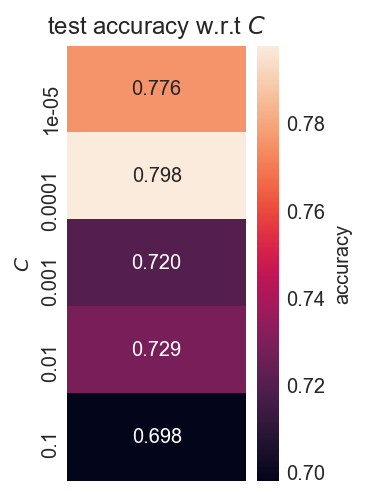

array([[0.77562327],
       [0.79778393],
       [0.72022161],
       [0.72853186],
       [0.69806094]])

In [19]:
# 5) Use the best C to calculate the test accuracy.
classifier.predict(X_test)
test_acc =classifier.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(test_acc, 'test accuracy', C_list)
test_acc

In [20]:
y_true, y_pred = Y_test, classifier.predict(X_test)
print (classification_report(y_true, y_pred))

             precision    recall  f1-score   support

        0.0       0.69      0.58      0.63        43
        1.0       0.67      0.77      0.72        48

avg / total       0.68      0.68      0.68        91



## Q6  Implement Grid Search

In [121]:
# 1) Load data.

X_and_Y =np.load('arrhythmia.npy')    # Load data from file.
np.random.shuffle(X_and_Y)
# Shuffle the data.
print(X_and_Y.shape) # Check the shapes.
X = X_and_Y[:,:]    # First column to second last column: Features (numerical values) 
Y = X_and_Y[:,-1]   # Last column: Labels (0 or 1)
print(X.shape, Y.shape) # Check the shapes.

(452, 280)
(452, 280) (452,)


In [122]:
# 2) Split the dataset into 2 parts: 
#    (a) Training set + Validation set  (80% of all data points)
#    (b) Test set                       (20% of all data points)
print ("train count: " , np.floor((len(X)*.8)))
print ("test count: " , int((len(X))-np.floor((len(X)*.8))))
train_ct=int(np.floor((len(X)*.8)))
X_train_val = X[:train_ct, :] # Get features from train + val set.
X_test = X[train_ct: , :] # Get features from test set.     
Y_train_val = Y[:train_ct] # Get labels from train + val set.
Y_test = Y[train_ct:] # Get labels from test set.  
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

ccc=[10**-5, 10**-4 , 10**-3, 10**-2, 10**-1]

train count:  361.0
test count:  91
(361, 280) (91, 280) (361,) (91,)


In [147]:
def cross_val(x_0, y_0, fold, c_list):
    #divides data into folds 
    # creates test and training set 
    outputx = []
    outputy = []
    
    intercept_list=[]
    coeff_list=[]
    avg_train=[]
    avg_val=[]

    splitsize = 1.0/fold*len(x_0)
    for i in range(fold):
        outputx.append(x_0[int(round(i*splitsize)):int(round((i+1)*splitsize))])
        outputy.append(y_0[int(round(i*splitsize)):int(round((i+1)*splitsize))])
    for i in range(fold):
        
        #split x into test and val
        trainx=outputx[i]
        outputx.pop(i)
        validatex=np.vstack(outputx)
        #split y into test and train
        trainy=outputy[i]
        outputy.pop(i)
        validatey=np.hstack(outputy)
        #print("Dimension Train X:Y", trainx.shape , " : ",validatex.shape)
        #print("Dimension Test: X:Y", validatex.shape," : ", validatey.shape)
        [intercept, coef, train_accuracy, validation_accuracy]=train_val_svm(trainx, trainy, validatex, validatey, c_list)
        
        intercept_list.append(intercept)
        coeff_list.append(coef)
        avg_train.append(train_accuracy)
        avg_val.append(validation_accuracy)
        
        
        
        
        
        
        return intercept, coef, avg_train, avg_val

In [148]:
intercept, coef, train_accuracy, validation_accuracy=cross_val(X_train_val,Y_train_val, 4, ccc)

In [149]:
print ([len(i) for i in [intercept, coef, train_accuracy, validation_accuracy]])

[1, 1, 1, 1]


In [125]:
def train_val_svm(trainx, trainy, validatex, validatey,c_list):
    #run svm for a specific value of c
    # to iterate over all c need another for loop
    train_accuracy_list=[]
    val_accuracy_list=[]
    for c in c_list:
        y_pred_list=[]
        coef_list=[]
        accuracy_list=[]
        classifier2=svm.LinearSVC(C=c)
        classifier2.fit(trainx, trainy)
        coef=(classifier2.coef_)
        #print (classifier2.coef_)
        intercept=(classifier2.intercept_)
        #print (classifier2.intercept_)
        y_pred_train=classifier.predict(trainx)
        train_accuracy=(y_pred_train-trainy)/(len(y_pred_train))
        train_accuracy_list.append(train_accuracy)
                
        
        
        y_pred_val=classifier.predict(validatex)
        validation_accuracy=(y_pred_val-validatey)/(len(y_pred_val))
        val_accuracy_list.append(validation_accuracy)
    
    
    
    
    #train_acc =classifier2.cv_results_["mean_train_score"].reshape(-1,1)
    #draw_heatmap_linear(train_acc, 'train accuracy', c)
    #classifier.predict(X_train_val)
    #val_acc =classifier2.cv_rcesults_['mean_test_score'].reshape(-1,1)
    #draw_heatmap_linear(val_acc, 'val accuracy', c)
    #print (len(val_acc))
    
    return intercept, coef, train_accuracy_list, val_accuracy_list
        
    


In [128]:
intercept, coef, train_accuracy, validation_accuracy=train_val_svm(trainx, trainy, validatex, validatey,ccc)

In [129]:
print ([len(i) for i in [intercept, coef, train_accuracy, validation_accuracy] ])

[1, 1, 5, 5]
